In [7]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np
from matplotlib import ticker


figuresDir='/Users/nathanvaughn/Desktop/ONCV-figures/'

plt.rc('font', family='sans-serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')


'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


<IPython.core.display.Javascript object>


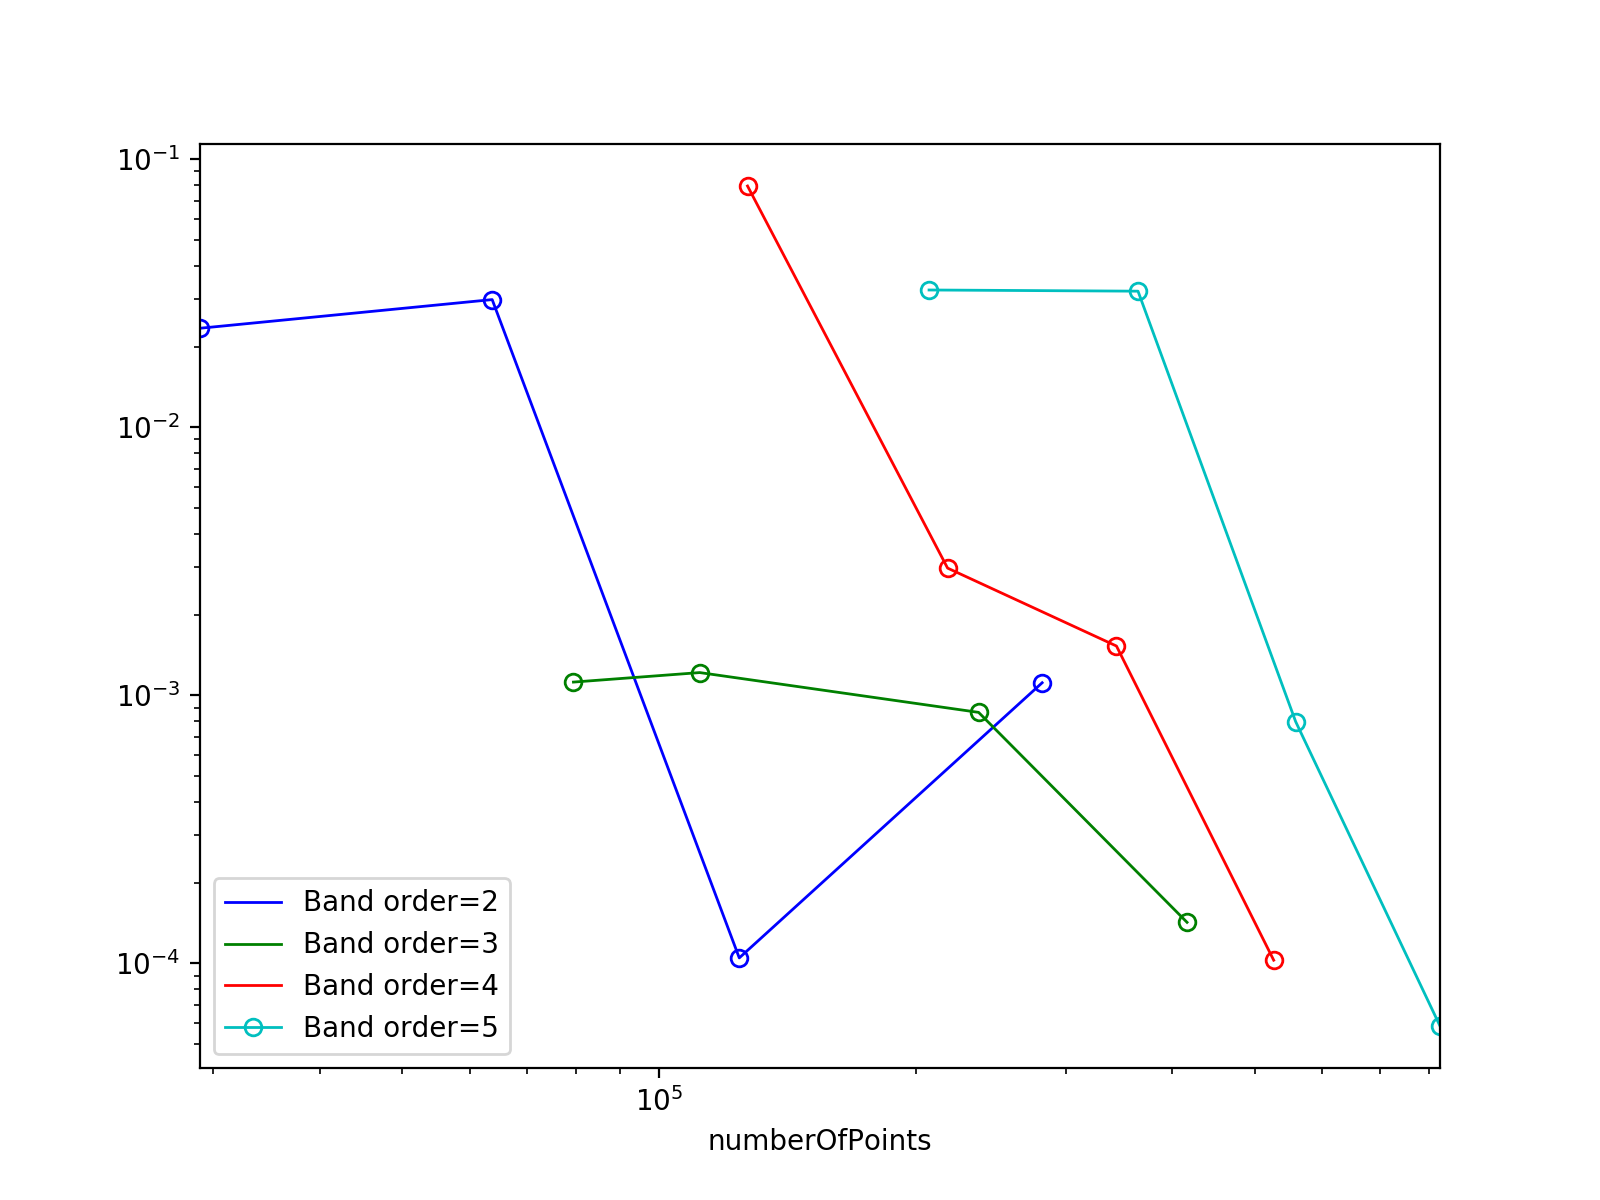

2
3
4
5
Saving figure to:  /Users/nathanvaughn/Desktop/ONCV-figures/Be-refinement.png


In [42]:
## Figure 2a: p refinement for Beryllium

# Load Data
try:
    file='runComparison.csv'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/ONCV-testing/Be-testing/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    TotalEnergy = -1.3081070563491320e+01
    BandEnergy = -8.1590838636563738e+00
    HartreeEnergy = 0.0
    ExchangeEnergy = -1.5993146189847285e+00
    CorrelationEnergy = -2.0573227465967248e-01
    KineticEnergy = 0.0

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    

# Plotting functions
def plot_error_versus(df,B,C,save=False):
#     default_cycler =  ( cycler(marker=['o', '^', 's',]) * cycler(linestyle=['-']) ) + cycler('color', 'bgr')
    default_cycler = cycler(marker=['o']) *cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    fig, ax = plt.subplots(figsize=(8,6))
#     df.plot(x=B, y="absTotalEnergyError", logy=True, fillstyle='none', ax=ax,legend=False)
# #     df.plot(x=B, y="absBandEnergyError", logy=True, fillstyle='none', ax=ax, label="Band Energy")
# #     df.plot(x=B, y="absHartreeEnergyError", logy=True, fillstyle='none', ax=ax, label="Hartree Energy")
# #     plt.legend()
#     plt.xlabel('Quadrature Order $p_{quad}$')
#     plt.ylabel('Total Energy Error (Ha/atom)')
#     plt.grid()

    grouped = df.groupby(C)
    for name,group in grouped:
        print(name)
#         if name==0:
#             lab='Without singularity subtraction'
#         if name==1:
#             lab='With singularity subtraction'
#         group.plot(x=B, y="absTotalEnergyError", ax=ax, fillstyle='none', loglog=True,label="Total "+C+"="+str(name))
        group.plot(x=B, y="absBandEnergyError", ax=ax, fillstyle='none', loglog=True,label="Band "+C+"="+str(name))
#         group.plot(x=B, y="absCorrelationEnergyError", ax=ax, fillstyle='none', loglog=True,label="Correlation "+C+"="+str(name))
#         group.plot(x=B, y="absExchangeEnergyError", ax=ax, fillstyle='none', loglog=True,label="Exchange "+C+"="+str(name))
        
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.xaxis.set_major_locator(ticker.LogLocator(numticks=4))
    
#     plt.ylim([1e-4,3e-3])
#     ax.text(0.1, 0.05, 'a', transform=ax.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')

    if save != False:
        saveID = save
        print('Saving figure to: ', figuresDir+saveID+'.png')
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()


# Plot call
df3 = df.loc[df['order']==4]
plot_error_versus(df,'numberOfPoints','order',save='Be-refinement')
# beryllium_p_refinement(df3,'absTotalEnergyError', 'numberOfPoints',save='CO-p-refinement')